## A chest X-ray medical image classifer for Pneumania

- Dataset https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


In [10]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [11]:
from fastai import *
from fastai.vision import *

In [12]:
path=Path('data/chest_xray')
#torch.cuda.set_device(1)

### Create ImageDataBunch and take a quick look at the data
- There is no separate validation set, so set aside 20% as validation data set.


['NORMAL', 'PNEUMONIA']
training size: 5216 validate size: 624


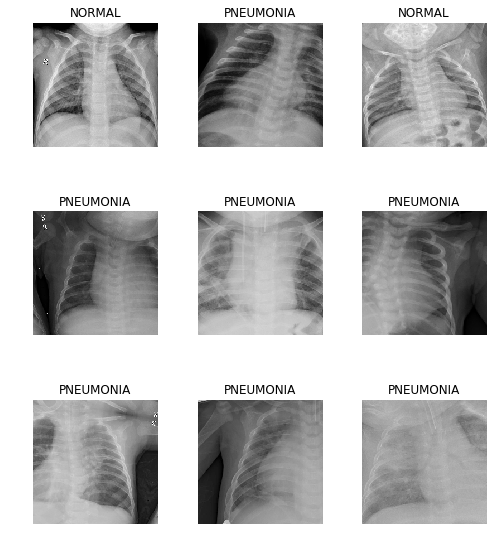

In [13]:
np.random.seed(42)
bs=64
data = ImageDataBunch.from_folder(path, train="train", valid="test",
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=bs).normalize(imagenet_stats)
print(data.classes)
print('training size: %s validate size: %s' %(len(data.train_ds), len(data.valid_ds)))
data.show_batch(rows=3, figsize=(7,8))

### Train Model
1. Usually you should use lr_finder first to find the learning rate. (default is 3e-3)
2. Train it first without unfreeze.
3. Unfreeze it and give differential learning rates and train again.
4. Do some data clean up and re-train again.

In [14]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

Total time: 03:36
epoch  train_loss  valid_loss  error_rate
1      0.292153    0.396896    0.128205    (00:53)
2      0.167045    0.323279    0.108974    (00:53)
3      0.117473    0.333506    0.121795    (00:54)
4      0.106158    0.312820    0.112179    (00:53)



In [15]:
learn.save('stage-1')

In [16]:
learn.load('stage-1')

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


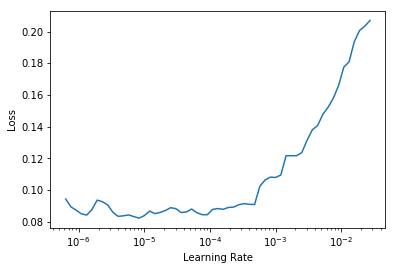

In [17]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(10,max_lr=slice(1e-5,1e-4))

Total time: 09:03
epoch  train_loss  valid_loss  error_rate
1      0.028732    0.346551    0.113782    (00:54)
2      0.037430    0.318226    0.100962    (00:54)
3      0.044447    0.295659    0.096154    (00:54)
4      0.048138    0.269490    0.091346    (00:54)
5      0.040269    0.395521    0.126603    (00:54)
6      0.029351    0.417008    0.123397    (00:54)
7      0.025922    0.359121    0.100962    (00:53)
8      0.032821    0.264903    0.076923    (00:54)
9      0.024496    0.290176    0.083333    (00:54)
10     0.020265    0.317082    0.092949    (00:54)



In [21]:
learn.save('stage-2')

### Interpretation

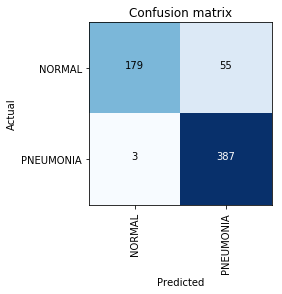

In [22]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()